In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.cluster as cluster

In [2]:
# import relevent libraries for clustering
from statistics import mode
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv('./data/35.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df_use=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
df_use.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df_use.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
# df_use['Yearly Spent']=['']*len(df_use)
df_use['Yearly Spent']=np.nan

C:\Users\84160\AppData\Local\Temp\ipykernel_5336\431646197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Yearly Spent']=np.nan


In [7]:
for i in range(len(df_use['Yearly Amount Spent'])):
    if df_use['Yearly Amount Spent'][i]<450:
        df_use['Yearly Spent'][i]='low'
    elif df_use['Yearly Amount Spent'][i]>=450 and df_use['Yearly Amount Spent'][i]<570:
        df_use['Yearly Spent'][i]='middle'
    elif df_use['Yearly Amount Spent'][i]>=570 :
        df_use['Yearly Spent'][i]='high'

C:\Users\84160\AppData\Local\Temp\ipykernel_5336\3649225101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Yearly Spent'][i]='high'
C:\Users\84160\AppData\Local\Temp\ipykernel_5336\3649225101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Yearly Spent'][i]='low'
C:\Users\84160\AppData\Local\Temp\ipykernel_5336\3649225101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Yearly Spent'][i]='middle'


In [8]:
df_use['Yearly Spent'].unique()

array(['high', 'low', 'middle'], dtype=object)

In [9]:
df_use[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]=df_use[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].round(2)

C:\Users\84160\AppData\Local\Temp\ipykernel_5336\2191104616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]=df_use[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].round(2)


In [10]:
df_use.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Yearly Spent
0,34.50,12.66,39.58,4.08,587.951054,high
1,31.93,11.11,37.27,2.66,392.204933,low
2,33.00,11.33,37.11,4.10,487.547505,middle
3,34.31,13.72,36.72,3.12,581.852344,high
4,33.33,12.80,37.54,4.45,599.406092,high


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df_use[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
# y=df_use['Yearly Spent']

scalar=StandardScaler()
scalar.fit(X)
X=scalar.transform(X)

In [12]:
df_use.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Yearly Spent
0,34.50,12.66,39.58,4.08,587.951054,high
1,31.93,11.11,37.27,2.66,392.204933,low
2,33.00,11.33,37.11,4.10,487.547505,middle
3,34.31,13.72,36.72,3.12,581.852344,high
4,33.33,12.80,37.54,4.45,599.406092,high


Perform K-means

In [297]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. 
# we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. 
# we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters.
distortions=[]
inertias=[]
k=11

for i in range(1,k):
    kmeanModel= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, metric='euclidean'),axis=1))/X.shape[0])
    inertias.append(kmeanModel.inertia_)
    df=pd.DataFrame.from_records({'Cluster':np.arange(1,i+1), 'Distortion':distortions, 'Inertia':inertias})

df

,Cluster,Distortion,Inertia
0,1,1.870947,2000.000000
1,2,1.694619,1649.885886
2,3,1.570915,1421.468054
3,4,1.478113,1255.901678
4,5,1.391325,1111.504782
5,6,1.339988,1031.904599
6,7,1.292722,959.888439
7,8,1.250878,889.005198
8,9,1.213524,842.639310
9,10,1.187358,801.595672


array([<AxesSubplot: xlabel='Cluster'>, <AxesSubplot: xlabel='Cluster'>],
      dtype=object)

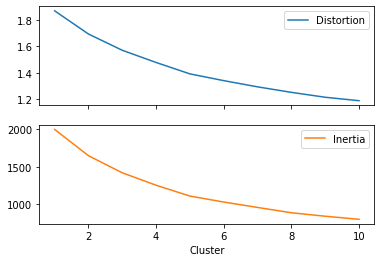

In [298]:
# plot distortion and inertia for kmeans
df.plot.line(x='Cluster',subplots=True)

<AxesSubplot: xlabel='Time on Website', ylabel='Length of Membership'>

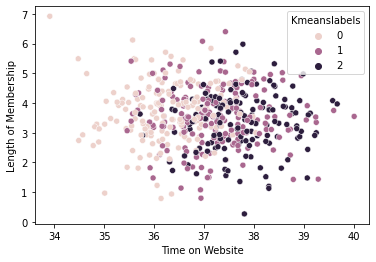

In [299]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(X)
labels_Kmeans=model.labels_
df_use['Kmeanslabels']=labels_Kmeans
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='Kmeanslabels')

In [300]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X, labels_Kmeans)
silhouette_avg

0.16393341081555826

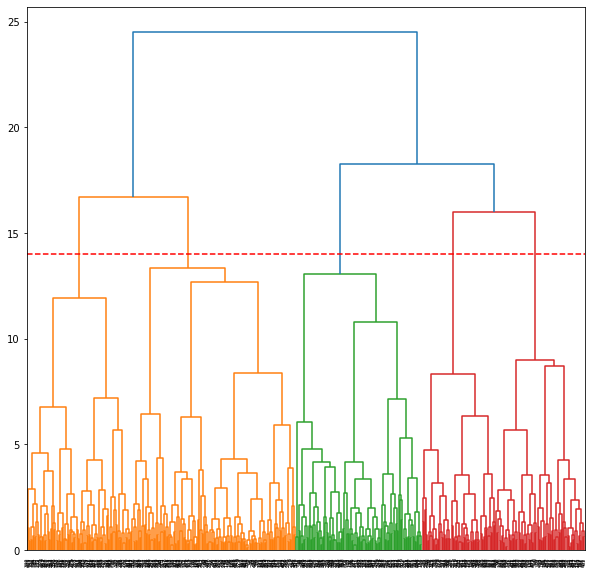

In [301]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,10))
Z=linkage(X,method='ward')
dend= dendrogram(Z)
plt.axhline(y=14,color='red',linestyle='--',label='14')
# The optimal is 5

<AxesSubplot: xlabel='Time on Website', ylabel='Length of Membership'>

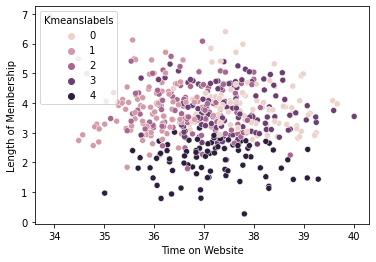

In [302]:
model = KMeans(n_clusters=5, init='k-means++', random_state=42)
model.fit(X)
labels_Kmeans=model.labels_
df_use['Kmeanslabels']=labels_Kmeans
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='Kmeanslabels')

In [303]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X, labels_Kmeans)
silhouette_avg

0.17938487747317847

Text(0.5, 1.0, 'Sort by using Kmeans')

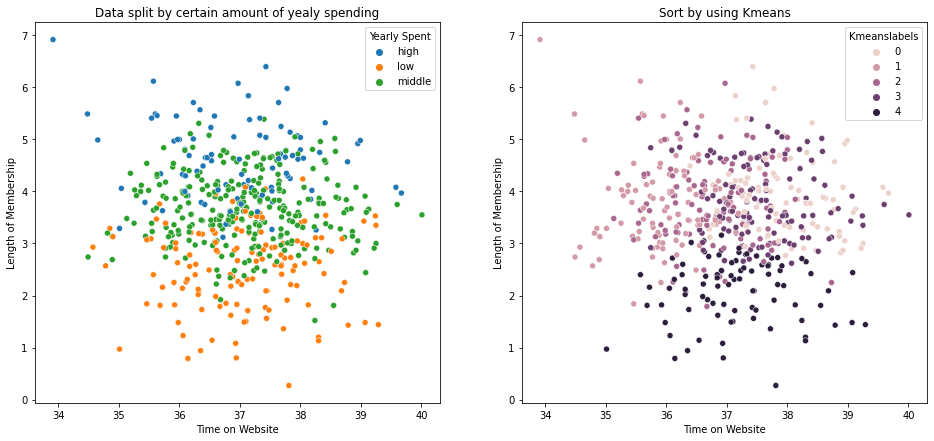

In [305]:
# compare to separate by value
df_use['Kmeanslabels']=labels_Kmeans
fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='Yearly Spent',ax=ax[0])
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='Kmeanslabels',ax=ax[1])
ax[0].set_title('Data split by certain amount of yealy spending')
ax[1].set_title('Sort by using Kmeans')

In [309]:
df_use['split to 5'] = pd.qcut( df_use['Yearly Amount Spent'],q=5, labels = range(1, 6, 1))
df_use['split to 5'] = pd.to_numeric(df_use['split to 5'])

Text(0.5, 1.0, 'Sort by using Kmeans')

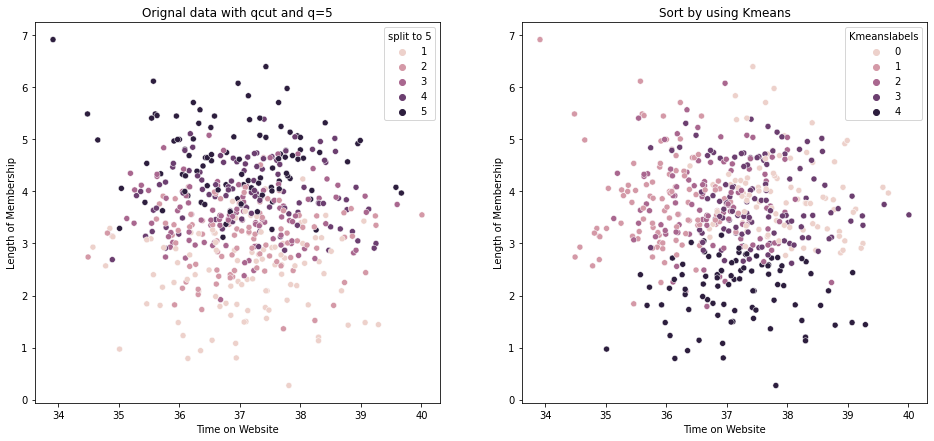

In [310]:
df_use['Kmeanslabels']=labels_Kmeans
fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='split to 5',ax=ax[0])
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='Kmeanslabels',ax=ax[1])
ax[0].set_title('Orignal data with qcut and q=5')
ax[1].set_title('Sort by using Kmeans')

DBSCAN

In [311]:
# perform DBSCAN clustering.
from sklearn.cluster import DBSCAN

# use the eps=0.76 first,min_samples=5
model = DBSCAN(eps=0.76, min_samples=5).fit(X)
labels_DB=model.labels_

In [312]:
np.unique(labels_DB)

array([-1,  0,  1], dtype=int64)

In [16]:
df_use['split to 3'] = pd.qcut( df_use['Yearly Amount Spent'],q=3, labels = range(1, 4, 1))
df_use['split to 3'] = pd.to_numeric(df_use['split to 3'])

Text(0.5, 1.0, 'Sort by using DBSCAN')

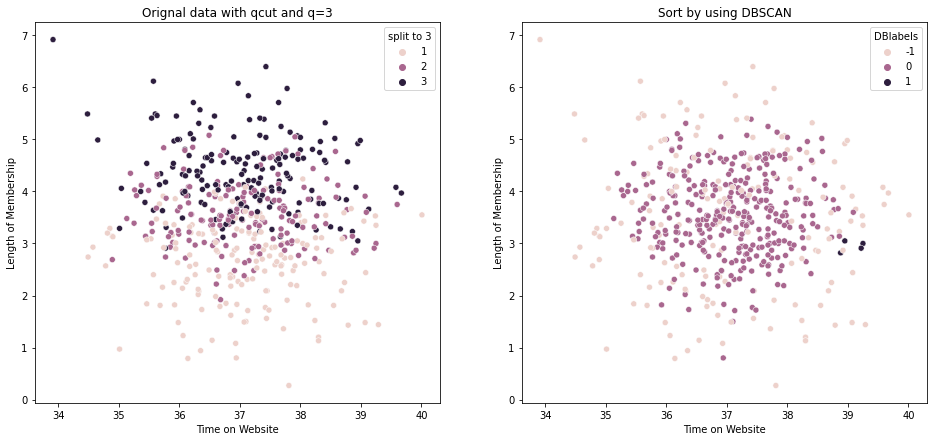

In [318]:
# use the scatter plot to check for the clustering 
df_use['DBlabels']=labels_DB
fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='split to 3',ax=ax[0])
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='DBlabels',ax=ax[1])
ax[0].set_title('Orignal data with qcut and q=3')
ax[1].set_title('Sort by using DBSCAN')

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X, labels_DB)
silhouette_avg

0.06107940306692706

In [321]:
# use the eps=0.65 first,min_samples=6
model = DBSCAN(eps=0.65, min_samples=6).fit(X)
labels_DB=model.labels_

In [322]:
np.unique(labels_DB)

array([-1,  0,  1,  2], dtype=int64)

In [345]:
df_use['split to 4'] = pd.qcut( df_use['Yearly Amount Spent'],q=4, labels = range(1, 5, 1))
df_use['split to 4'] = pd.to_numeric(df_use['split to 4'])

Text(0.5, 1.0, 'Sort by using DBSCAN')

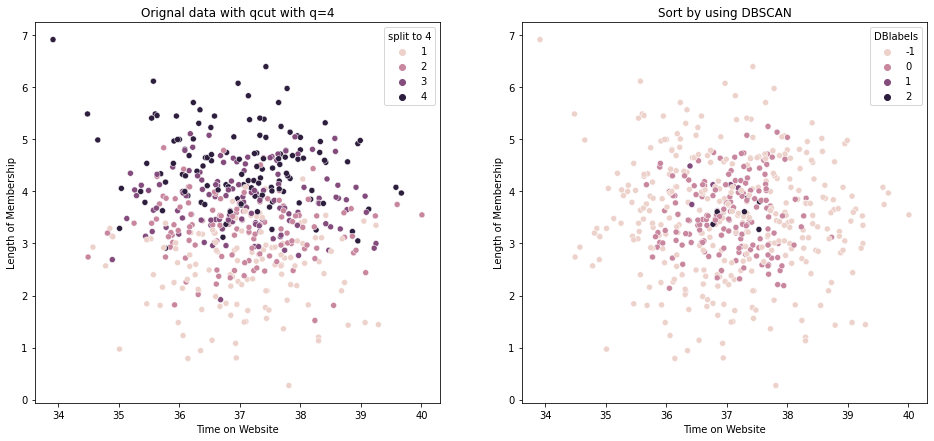

In [324]:
# use the scatter plot to check for the clustering 
df_use['DBlabels']=labels_DB
fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='split to 4',ax=ax[0])
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='DBlabels',ax=ax[1])
ax[0].set_title('Orignal data with qcut with q=4')
ax[1].set_title('Sort by using DBSCAN')

Agglomerative Clustering (Hierarchical clustering)

In [13]:
# Perform Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# using the method affinity= 'euclidean'
model=AgglomerativeClustering(affinity='euclidean').fit(X)
labels=model.labels_

In [28]:
np.unique(labels)

array([0, 1], dtype=int64)

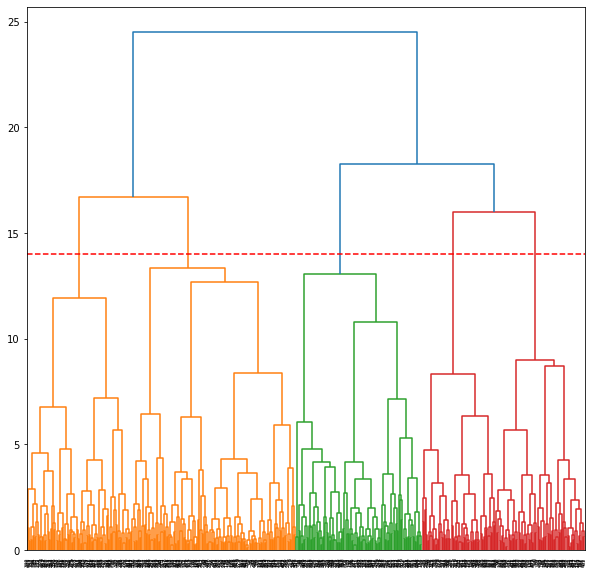

In [27]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,10))
Z=linkage(X,method='ward')
dend= dendrogram(Z)
plt.axhline(y=14,color='red',linestyle='--',label='14')
# The optimal is 5

<AxesSubplot: xlabel='Time on Website', ylabel='Length of Membership'>

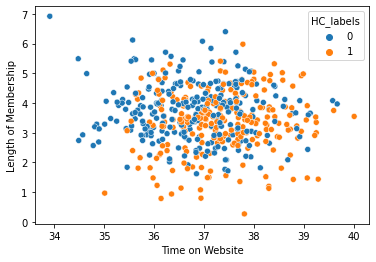

In [31]:
df_use['HC_labels']=labels
# fig,ax=plt.subplots(1,2,figsize=(16,7))
# sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='Yearly Spent',ax=ax[0])
# sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='HClabels',ax=ax[1])
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='HC_labels')

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.14222258080005254

In [14]:
model= AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward').fit(X)
labels=model.labels_

Text(0.5, 1.0, 'Sort by using Agglomerative Clustering')

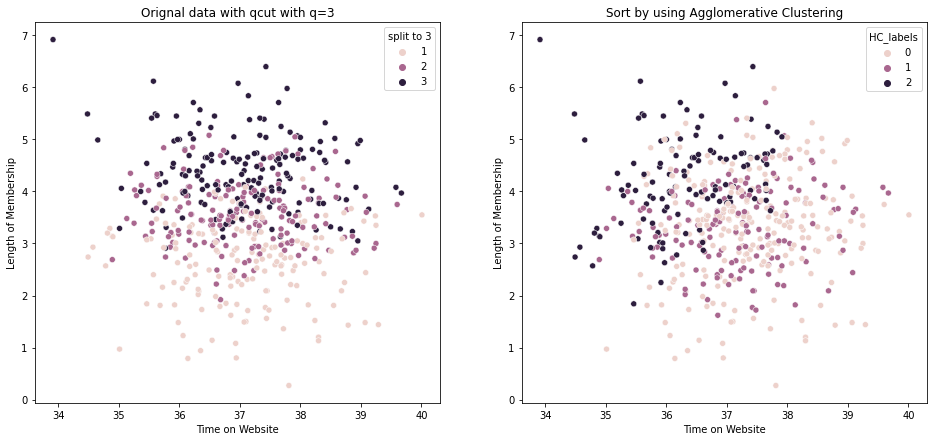

In [17]:
df_use['HC_labels']=labels
fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='split to 3',ax=ax[0])
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='HC_labels',ax=ax[1])
ax[0].set_title('Orignal data with qcut with q=3')
ax[1].set_title('Sort by using Agglomerative Clustering')

In [343]:
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.12209379277469996

In [347]:
model= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward').fit(X)
labels=model.labels_

Text(0.5, 1.0, 'Sort by using Agglomerative Clustering')

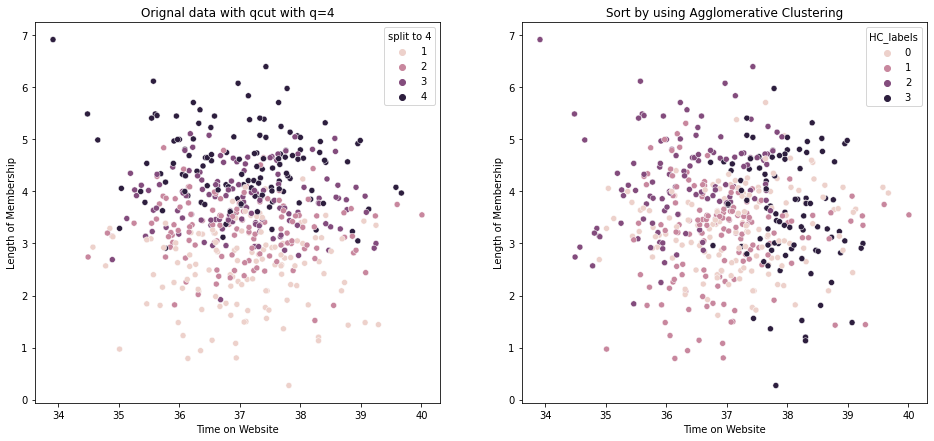

In [348]:
df_use['HC_labels']=labels
fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='split to 4',ax=ax[0])
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='HC_labels',ax=ax[1])
ax[0].set_title('Orignal data with qcut with q=4')
ax[1].set_title('Sort by using Agglomerative Clustering')

In [335]:
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.11025083683774076

In [29]:
# Perform MeanShift Clustering and predict number 
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

model=MeanShift(bandwidth=2).fit(X)
labels=model.labels_
cluster_center=model.cluster_centers_
labels_unique=np.unique(labels)
n_clusters=len(labels_unique)
print('number of estimated clusters : %d'% n_clusters)

number of estimated clusters : 2


<AxesSubplot: xlabel='Time on Website', ylabel='Length of Membership'>

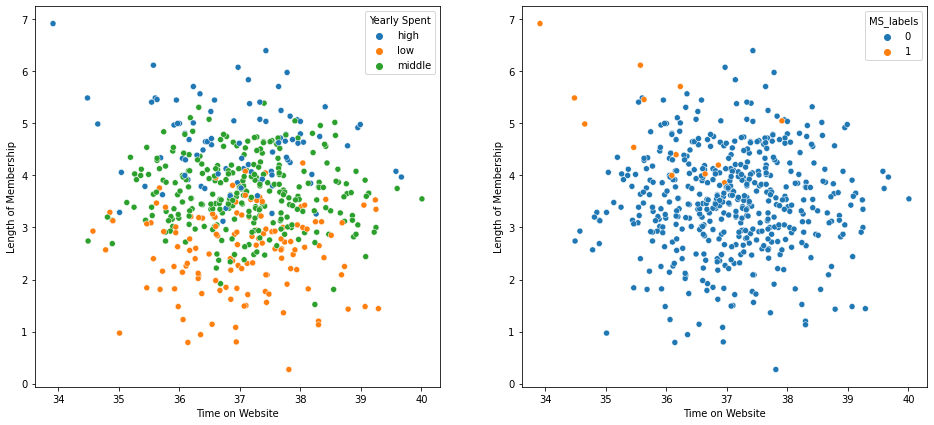

In [30]:
df_use['MS_labels']=labels

fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='Yearly Spent',ax=ax[0])
sns.scatterplot(data=df_use,x='Time on Website',y='Length of Membership',hue='MS_labels',ax=ax[1])

In [ ]:
# We can see that this dataset cannot clustering pretty well

In [31]:
# since low silhouette_avg score and difference of scatter compares to the original datasets, therefore 
# This data cannot split into cluster pretty well.

In [32]:
# Check another dataset to see whether it can successfully cluster it.

In [33]:
# use to check whether this customer is has strong loyalty or potential or Lost

In [39]:
df2=pd.read_csv('./data_cleaned/Electronic transactions of customers with different products.csv')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Weekdays
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,12,2


In [40]:
df2['TotalAmount'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Weekdays,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,12,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,12,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,12,2,20.34


In [41]:
df2.groupby('CustomerID')['TotalAmount'].sum()

CustomerID
12347    4310.00
12348    1797.24
12349    1457.55
12350     334.40
12352    1849.49
          ...   
18280     180.60
18281      80.82
18282     178.05
18283    2045.53
18287    1837.28
Name: TotalAmount, Length: 4322, dtype: float64

In [37]:
####################################3
#########################################
#######################################
##############################################################

In [42]:
df2['InvoiceDate']= pd.to_datetime(df2['InvoiceDate'])


In [43]:
# create a new data frame according to the customer ID
# First check the number of non-unqiue date and the sum of total amount of spending of a customer
df_use=df2.groupby('CustomerID').agg({'InvoiceDate': 'nunique','TotalAmount': 'sum'})
df_use.rename(columns={'InvoiceDate':'frequency'},inplace=True)

In [44]:
# calculate the last time a customer bought a product
df_time=df2.groupby('CustomerID').agg({'InvoiceDate':'max'})
df_time.rename(columns={'InvoiceDate':'Recent_Purchase'},inplace=True)

In [45]:
# merge to form the new dataset used for clustering
df2_cleaned = pd.merge(df_use,df_time, on='CustomerID',how='outer')
df2_cleaned.head()

,frequency,TotalAmount,Recent_Purchase
CustomerID,,,
12347,7,4310.00,2011-12-07 15:52:00
12348,4,1797.24,2011-09-25 13:13:00
12349,1,1457.55,2011-11-21 09:51:00
12350,1,334.40,2011-02-02 16:01:00
12352,8,1849.49,2011-11-03 14:37:00


In [46]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4322 entries, 12347 to 18287
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   frequency        4322 non-null   int64         
 1   TotalAmount      4322 non-null   float64       
 2   Recent_Purchase  4322 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 135.1 KB


In [47]:
df2_cleaned.describe()

,frequency,TotalAmount
count,4322.000000,4322.000000
mean,4.239704,1893.786331
std,7.594345,7734.170039
min,1.000000,2.900000
25%,1.000000,304.242500
50%,2.000000,663.630000
75%,5.000000,1630.857500
max,209.000000,266779.460000


In [48]:
earliest=df2['InvoiceDate'].min()
earliest

Timestamp('2010-12-01 08:26:00')

In [49]:
# convert the recent purchase to the number of days using the recent_Purchase minus the earliest date in the whole dataframe
# which means the higher the number of days relative to the earliest purchase of the whole customers
# The more recent purchase a customer did
earliest=df2['InvoiceDate'].min()
df2_cleaned['Recent_Purchase'] = df2_cleaned['Recent_Purchase'].apply(lambda x : (x - earliest).days)


In [50]:
df2_cleaned.head()

,frequency,TotalAmount,Recent_Purchase
CustomerID,,,
12347,7,4310.00,371
12348,4,1797.24,298
12349,1,1457.55,355
12350,1,334.40,63
12352,8,1849.49,337


Kmeans

In [51]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [52]:
# use MiniMaxScaler
X= MinMaxScaler().fit_transform(df2_cleaned)
# X= StandardScaler().fit_transform(df2_cleaned)

In [53]:
sum_of_squared_distances = []
K = 11
for i in range(1,K):
    k_means = KMeans(n_clusters=i)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

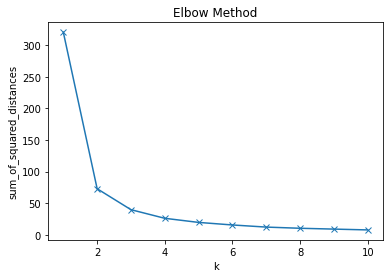

In [104]:
plt.plot(range(1,K), sum_of_squared_distances, 'x-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()
# from the graph, the optimal cluster is 3 or 4 since the decrease in inertia begins to slow.

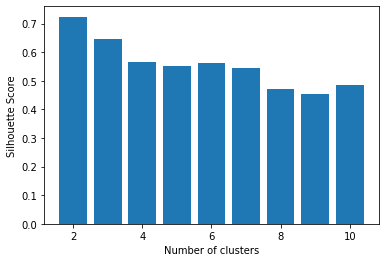

In [105]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting plot the number of clusters vs the silhouette score
k = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [67]:
# n=3
k_means_3 = KMeans(n_clusters=3)
model = k_means_3.fit(X)
labels_3 = k_means_3.labels_

In [64]:
# metrics.silhouette_score(X, labels_3, metric = 'euclidean')
from sklearn.metrics import silhouette_score
silhouette_score(X, labels_3)

0.6473595395107178

In [68]:
df2_copy=df2_cleaned.copy()
df2_copy['Cluster3']=labels_3

In [69]:
df2_copy.head()

,frequency,TotalAmount,Recent_Purchase,Cluster3
CustomerID,,,,
12347,7,4310.00,371,1
12348,4,1797.24,298,1
12349,1,1457.55,355,1
12350,1,334.40,63,2
12352,8,1849.49,337,1


In [70]:
table = df2_copy.groupby('Cluster3').agg({'frequency': 'mean', 'TotalAmount':'mean', 'Recent_Purchase': 'mean'})
table['Number of user'] = df2_copy['Cluster3'].value_counts()
table

,frequency,TotalAmount,Recent_Purchase,Number of user
Cluster3,,,,
0,2.210063,721.456039,219.418868,795
1,5.416810,2535.480135,341.164313,2903
2,1.349359,402.064327,78.964744,624


<AxesSubplot: xlabel='TotalAmount', ylabel='frequency'>

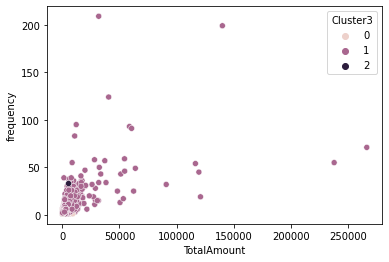

In [129]:
# fig,ax=plt.subplots(1,2,figsize=(16,7))
# sns.scatterplot(data=df2_copy,x='TotalAmount',y='frequency',hue='Yearly Spent',ax=ax[0])
# sns.scatterplot(data=df2_copy,x='TotalAmount',y='frequency',hue='DBlabels',ax=ax[1])
# ax[0].set_title('Orignal data')
# ax[1].set_title('Sort by using DBSCAN')

sns.scatterplot(data=df2_copy,x='TotalAmount',y='frequency',hue='Cluster3')



In [77]:
# n=4
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X)
labels_4 = k_means_4.labels_

In [60]:
silhouette_score(X, labels_4)

0.5655773779911704

In [78]:
df2_copy['Cluster4']=labels_4
df2_copy.head()

,frequency,TotalAmount,Recent_Purchase,Cluster3,Cluster4
CustomerID,,,,,
12347,7,4310.00,371,1,1
12348,4,1797.24,298,1,3
12349,1,1457.55,355,1,1
12350,1,334.40,63,2,2
12352,8,1849.49,337,1,1


In [79]:
table = df2_copy.groupby('Cluster4').agg({'frequency': 'mean', 'TotalAmount':'mean', 'Recent_Purchase': 'mean'})
table['Number of user'] = df2_copy['Cluster4'].value_counts()
table

,frequency,TotalAmount,Recent_Purchase,Number of user
Cluster4,,,,
0,1.855285,576.948229,181.895935,615
1,6.437264,3086.584991,354.321226,2120
2,1.346076,397.382837,64.609658,497
3,2.630275,999.139369,292.636697,1090


<AxesSubplot: xlabel='TotalAmount', ylabel='frequency'>

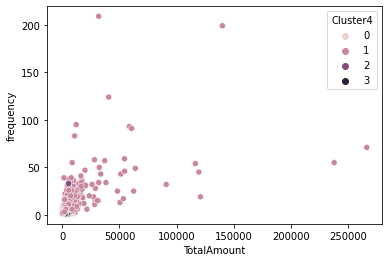

In [80]:
sns.scatterplot(data=df2_copy,x='TotalAmount',y='frequency',hue='Cluster4')

In [81]:
df2_copy.describe()

,frequency,TotalAmount,Recent_Purchase,Cluster3,Cluster4
count,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,4.239704,1893.786331,280.914391,0.960435,1.477094
std,7.594345,7734.170039,100.055546,0.571691,1.019167
min,1.000000,2.900000,0.000000,0.000000,0.000000
25%,1.000000,304.242500,231.250000,1.000000,1.000000
50%,2.000000,663.630000,323.000000,1.000000,1.000000
75%,5.000000,1630.857500,356.000000,1.000000,3.000000
max,209.000000,266779.460000,373.000000,2.000000,3.000000


In [82]:
df2_copy_graph=df2_copy[(df2_copy['frequency']<=30) & (df2_copy['TotalAmount']<20000)]

Text(0.5, 1.0, '3 clusters')

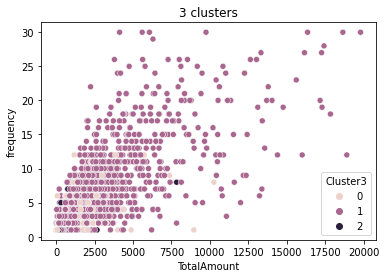

In [83]:
# ########################
###    Delete   Later     ###############
# plt.figure(figsize=(18,10))
sns.scatterplot(data=df2_copy_graph,x='TotalAmount',y='frequency',hue='Cluster3')
plt.title('3 clusters')

Text(0.5, 1.0, '4 clusters')

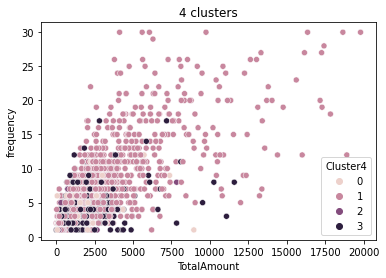

In [84]:
sns.scatterplot(data=df2_copy_graph,x='TotalAmount',y='frequency',hue='Cluster4')
plt.title('4 clusters')

In [184]:
# StandardScaler()
X2= StandardScaler().fit_transform(df2_cleaned)

In [185]:
sum_of_squared_distances = []
K = 11
for i in range(1,K):
    k_means = KMeans(n_clusters=i)
    model = k_means.fit(X2)
    sum_of_squared_distances.append(k_means.inertia_)

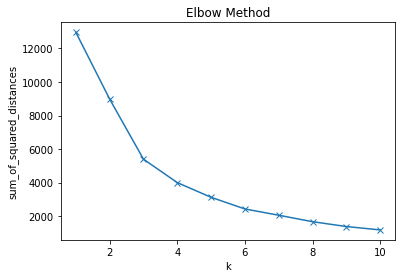

In [148]:
plt.plot(range(1,K), sum_of_squared_distances, 'x-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

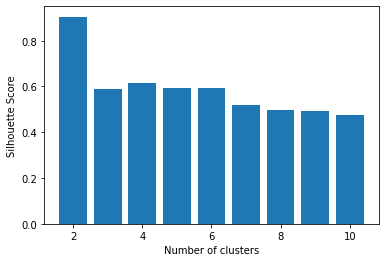

In [149]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(X2, KMeans(n_clusters = n_cluster).fit_predict(X2))) 
    
# Plotting plot the number of clusters vs the silhouette score
k = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

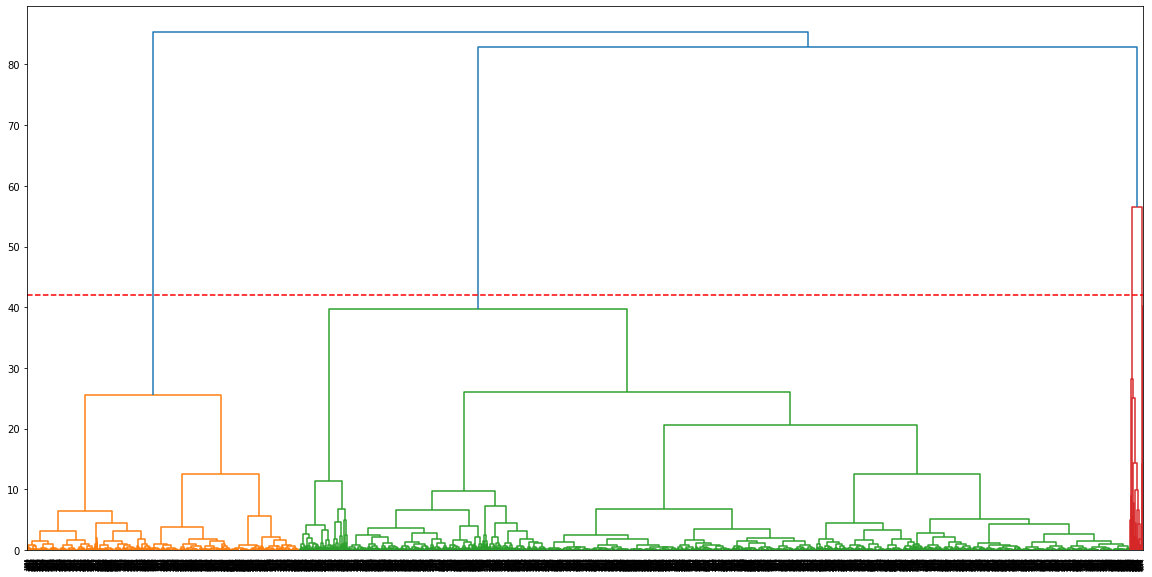

In [187]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
Z=linkage(X2,method='ward')
dend= dendrogram(Z)
plt.axhline(y=42,color='red',linestyle='--',label='42')

In [152]:
# n=3
k_means_3 = KMeans(n_clusters=3)
model = k_means_3.fit(X2)
labels_3_SD = k_means_3.labels_
silhouette_score(X2, labels_3_SD)

0.5886587689635573

In [153]:
df2_copy_SD=df2_cleaned.copy()
df2_copy_SD['Cluster3']=labels_3_SD
df2_copy_SD.head()

,frequency,TotalAmount,Recent_Purchase,Cluster3
CustomerID,,,,
12347,7,4310.00,371,1
12348,4,1797.24,298,1
12349,1,1457.55,355,1
12350,1,334.40,63,0
12352,8,1849.49,337,1


In [154]:
table_SD = df2_copy_SD.groupby('Cluster3').agg({'frequency': 'mean', 'TotalAmount':'mean', 'Recent_Purchase': 'mean'})
table_SD['Number of user'] = df2_copy_SD['Cluster3'].value_counts()
table_SD

,frequency,TotalAmount,Recent_Purchase,Number of user
Cluster3,,,,
0,1.566697,468.040157,127.139834,1087
1,4.686994,1861.943442,332.359988,3214
2,74.142857,80566.602381,366.952381,21


<AxesSubplot: xlabel='TotalAmount', ylabel='frequency'>

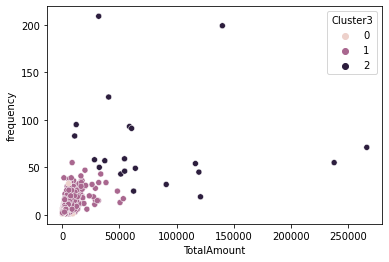

In [155]:
sns.scatterplot(data=df2_copy_SD,x='TotalAmount',y='frequency',hue='Cluster3')

In [156]:
# n=4
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X2)
labels_4_SD = k_means_4.labels_
silhouette_score(X2, labels_4_SD)

0.614980799668023

In [157]:
df2_copy_SD['Cluster4']=labels_4_SD
df2_copy_SD.head()

,frequency,TotalAmount,Recent_Purchase,Cluster3,Cluster4
CustomerID,,,,,
12347,7,4310.00,371,1,3
12348,4,1797.24,298,1,3
12349,1,1457.55,355,1,3
12350,1,334.40,63,0,1
12352,8,1849.49,337,1,3


In [158]:
table_SD = df2_copy_SD.groupby('Cluster4').agg({'frequency': 'mean', 'TotalAmount':'mean', 'Recent_Purchase': 'mean'})
table_SD['Number of user'] = df2_copy_SD['Cluster4'].value_counts()
table_SD

,frequency,TotalAmount,Recent_Purchase,Number of user
Cluster4,,,,
0,22.237864,11547.752961,361.611650,206
1,1.544173,465.851345,125.070489,1064
2,90.181818,116823.559091,368.636364,11
3,3.652746,1323.703529,329.658007,3041


<AxesSubplot: xlabel='TotalAmount', ylabel='frequency'>

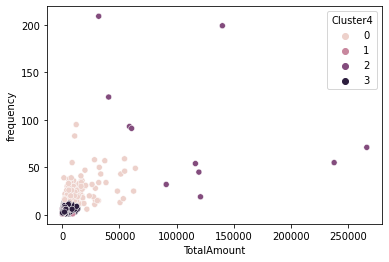

In [159]:
sns.scatterplot(data=df2_copy_SD,x='TotalAmount',y='frequency',hue='Cluster4')

In [ ]:
###################################3
##### test for only using the frequency and TotalAmount to cluster the customers ###

In [178]:
df2_2=df2_cleaned.copy()
scaler=MinMaxScaler()
df2_2['frequency_scaler']=scaler.fit_transform(df2_2[['frequency']])
df2_2['TotalAmount_scaler']=scaler.fit_transform(df2_2[['TotalAmount']])

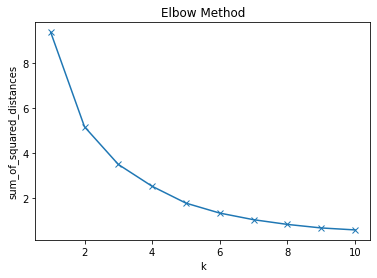

In [177]:
sum_of_squared_distances = []
K = 11
for i in range(1,K):
    k_means = KMeans(n_clusters=i)
    model = k_means.fit(df2_2[['frequency_scaler','TotalAmount_scaler']])
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(range(1,K), sum_of_squared_distances, 'x-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

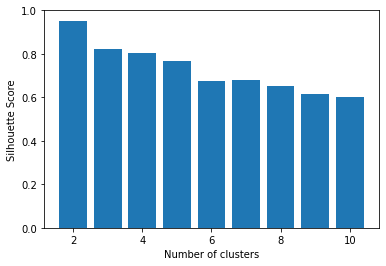

In [179]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df2_2[['frequency_scaler','TotalAmount_scaler']], KMeans(n_clusters = n_cluster).fit_predict(df2_2[['frequency_scaler','TotalAmount_scaler']]))) 
    
# Plotting plot the number of clusters vs the silhouette score
k = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

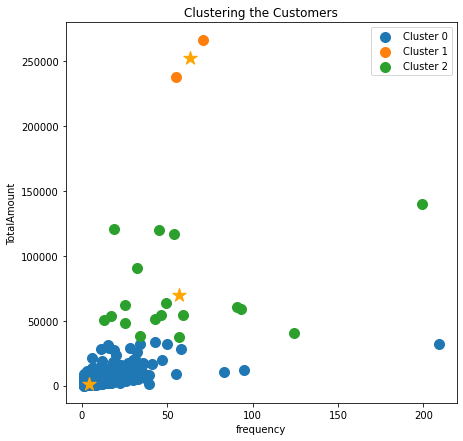

In [167]:
km=KMeans(n_clusters=3)
points=df2_2[['frequency','TotalAmount']].to_numpy()
y_km=km.fit_predict(points)

fig, axes = plt.subplots(1,1,figsize=(7,7))
Cluster_0=plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100)
Cluster_1=plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100)
Cluster_2=plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100)


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid',s=200)
plt.xlabel('frequency')
plt.ylabel('TotalAmount')
plt.title('Clustering the Customers')
plt.legend([Cluster_0,Cluster_1,Cluster_2],['Cluster 0','Cluster 1','Cluster 2'])

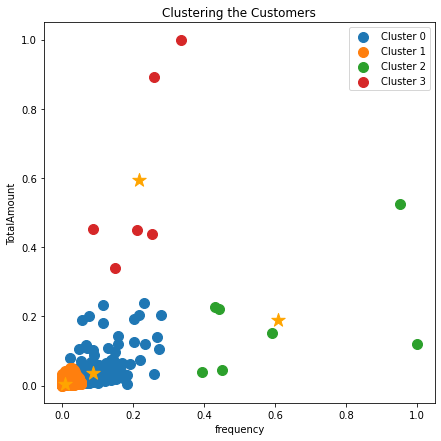

In [162]:
km=KMeans(n_clusters=4)
points=df2_2[['frequency_scaler','TotalAmount_scaler']].to_numpy()
y_km=km.fit_predict(points)

fig, axes = plt.subplots(1,1,figsize=(7,7))
Cluster_0=plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100)
Cluster_1=plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100)
Cluster_2=plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100)
Cluster_3=plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100)


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid',s=200)
plt.xlabel('frequency')
plt.ylabel('TotalAmount')
plt.title('Clustering the Customers')
plt.legend([Cluster_0,Cluster_1,Cluster_2,Cluster_3],['Cluster 0','Cluster 1','Cluster 2','Cluster 3'])

In [180]:
df2_3=df2_cleaned.copy()
scaler=StandardScaler()
df2_2['frequency_scaler']=scaler.fit_transform(df2_2[['frequency']])
df2_2['TotalAmount_scaler']=scaler.fit_transform(df2_2[['TotalAmount']])

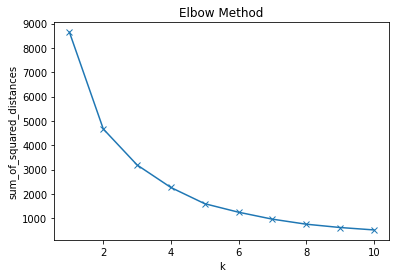

In [175]:
sum_of_squared_distances = []
K = 11
for i in range(1,K):
    k_means = KMeans(n_clusters=i)
    model = k_means.fit(df2_2[['frequency_scaler','TotalAmount_scaler']])
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(range(1,K), sum_of_squared_distances, 'x-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

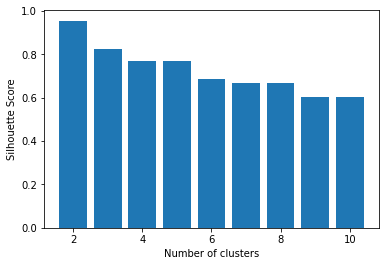

In [181]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df2_2[['frequency_scaler','TotalAmount_scaler']], KMeans(n_clusters = n_cluster).fit_predict(df2_2[['frequency_scaler','TotalAmount_scaler']]))) 
    
# Plotting plot the number of clusters vs the silhouette score
k = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

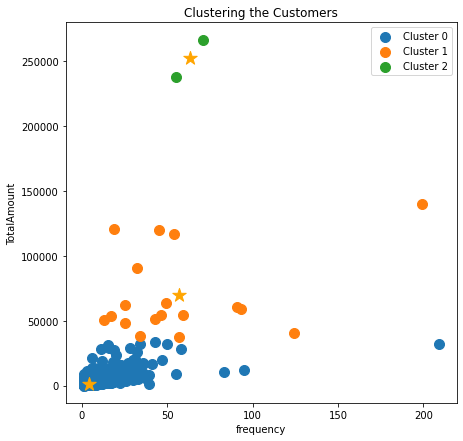

In [170]:
km=KMeans(n_clusters=3)
points=df2_2[['frequency','TotalAmount']].to_numpy()
y_km=km.fit_predict(points)

fig, axes = plt.subplots(1,1,figsize=(7,7))
Cluster_0=plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100)
Cluster_1=plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100)
Cluster_2=plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100)


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid',s=200)
plt.xlabel('frequency')
plt.ylabel('TotalAmount')
plt.title('Clustering the Customers')
plt.legend([Cluster_0,Cluster_1,Cluster_2],['Cluster 0','Cluster 1','Cluster 2'])

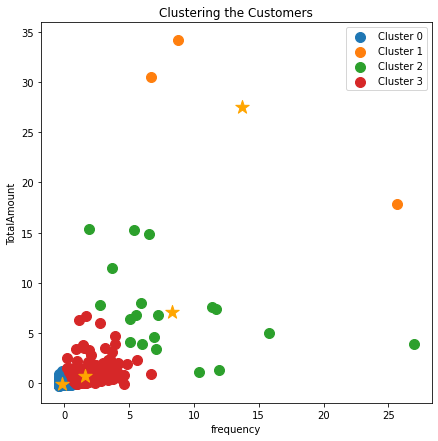

In [171]:
km=KMeans(n_clusters=4)
points=df2_2[['frequency_scaler','TotalAmount_scaler']].to_numpy()
y_km=km.fit_predict(points)

fig, axes = plt.subplots(1,1,figsize=(7,7))
Cluster_0=plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100)
Cluster_1=plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100)
Cluster_2=plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100)
Cluster_3=plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100)


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid',s=200)
plt.xlabel('frequency')
plt.ylabel('TotalAmount')
plt.title('Clustering the Customers')
plt.legend([Cluster_0,Cluster_1,Cluster_2,Cluster_3],['Cluster 0','Cluster 1','Cluster 2','Cluster 3'])

DBSCAN

In [278]:
# perform DBSCAN clustering.
from sklearn.cluster import DBSCAN

# Use MinMaxScaler()
# use the eps=0.2 first,min_samples=5
model = DBSCAN(eps=0.2, min_samples=5).fit(X2)
labels_DB=model.labels_
# silhouette_score(X, labels_DB)

In [279]:
df2_DB=df2_cleaned.copy()
df2_DB['Cluster']=labels_DB
df2_DB.head()

,frequency,TotalAmount,Recent_Purchase,Cluster
CustomerID,,,,
12347,7,4310.00,371,0
12348,4,1797.24,298,0
12349,1,1457.55,355,0
12350,1,334.40,63,0
12352,8,1849.49,337,0


In [280]:
table = df2_DB.groupby('Cluster').agg({'frequency': 'mean', 'TotalAmount':'mean', 'Recent_Purchase': 'mean'})
table['Number of user'] = df2_DB['Cluster'].value_counts()
table

,frequency,TotalAmount,Recent_Purchase,Number of user
Cluster,,,,
-1,25.303226,21170.546516,321.800000,155
0,3.398460,1163.205350,279.163378,4156
1,25.600000,8221.446000,365.800000,5
2,25.000000,4686.858333,366.833333,6


Text(0.5, 1.0, 'StandardScaler')

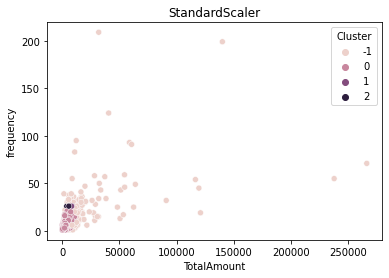

In [281]:
#DBSCAN algorithm did not work very well this time due to the diferent density of each cluster
sns.scatterplot(data=df2_DB,x='TotalAmount',y='frequency',hue='Cluster')
plt.title('StandardScaler')

In [282]:
# use very small eps
model = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels_DB=model.labels_

In [283]:
df2_DB['Cluster']=labels_DB
table = df2_DB.groupby('Cluster').agg({'frequency': 'mean', 'TotalAmount':'mean', 'Recent_Purchase': 'mean'})
table['Number of user'] = df2_DB['Cluster'].value_counts()
table

,frequency,TotalAmount,Recent_Purchase,Number of user
Cluster,,,,
-1,133.500000,169241.595000,372.500000,4
0,4.119963,1738.762887,280.829551,4318


Text(0.5, 1.0, 'MinMaxScaler')

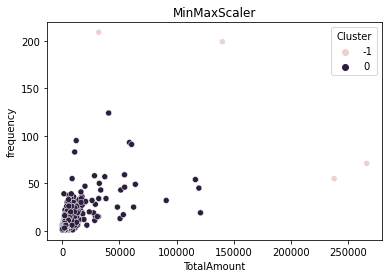

In [284]:
#DBSCAN algorithm did not work very well this time due to the diferent density of each cluster
sns.scatterplot(data=df2_DB,x='TotalAmount',y='frequency',hue='Cluster')
plt.title('MinMaxScaler')

Agglomerative Clustering (Hierarchical clustering)

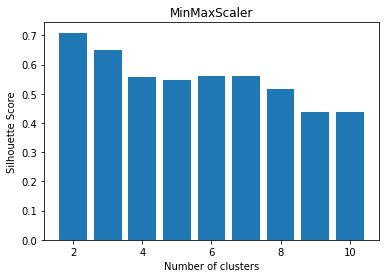

In [96]:
# Agglomerative Cluster for MinMaxScaler
silhouette_scores = [] 

for i in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(X, AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'ward').fit_predict(X))) 
    
# Plotting plot the number of clusters vs the silhouette score
k = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('MinMaxScaler')
plt.show()

In [85]:
X2= StandardScaler().fit_transform(df2_cleaned)

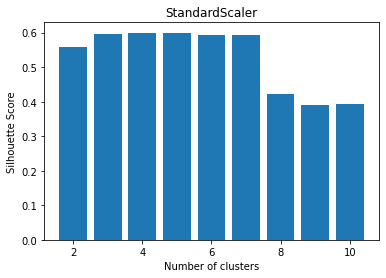

In [244]:
# Agglomerative Cluster for StandardScaler()
silhouette_scores = [] 

for i in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(X2, AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'ward').fit_predict(X2))) 
    
# Plotting plot the number of clusters vs the silhouette score
k = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('StandardScaler')
plt.show()

In [86]:
#Agglomerative Cluster
agg = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward').fit(X)
labels_agg=agg.labels_

In [87]:
silhouette_score(X, labels_agg)

0.5578309510533869

In [272]:
df2_agg=df2_cleaned.copy()
df2_agg['Cluster']=labels_agg
df2_agg.head()

,frequency,TotalAmount,Recent_Purchase,Cluster
CustomerID,,,,
12347,7,4310.00,371,1
12348,4,1797.24,298,3
12349,1,1457.55,355,1
12350,1,334.40,63,0
12352,8,1849.49,337,1


In [273]:
table_agg = df2_agg.groupby('Cluster').agg({'frequency': 'mean', 'TotalAmount':'mean', 'Recent_Purchase': 'mean'})
table_agg['Number of user'] = df2_agg['Cluster'].value_counts()
table_agg

,frequency,TotalAmount,Recent_Purchase,Number of user
Cluster,,,,
0,1.352649,401.089586,76.706954,604
1,6.448439,3091.017214,354.403500,2114
2,2.043269,649.498623,202.185897,624
3,2.653061,1023.458043,298.375510,980


<AxesSubplot: xlabel='TotalAmount', ylabel='frequency'>

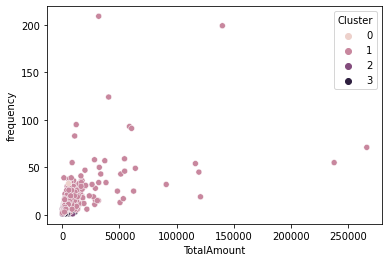

In [274]:
sns.scatterplot(data=df2_agg,x='TotalAmount',y='frequency',hue='Cluster')

In [93]:
# using StandardScaler
agg = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward').fit(X2)
labels_agg=agg.labels_

In [94]:
silhouette_score(X2, labels_agg)

0.59702451070215

In [95]:
df2_agg=df2_cleaned.copy()
df2_agg['Cluster']=labels_agg
table_agg = df2_agg.groupby('Cluster').agg({'frequency': 'mean', 'TotalAmount':'mean', 'Recent_Purchase': 'mean'})
table_agg['Number of user'] = df2_agg['Cluster'].value_counts()
table_agg

,frequency,TotalAmount,Recent_Purchase,Number of user
Cluster,,,,
0,48.244898,49143.080408,367.163265,49
1,1.596789,482.052371,124.635505,1059
2,4.439639,1638.593691,331.092719,3214


<AxesSubplot: xlabel='TotalAmount', ylabel='frequency'>

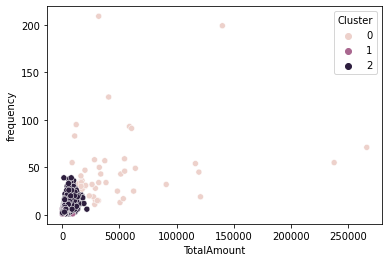

In [263]:
sns.scatterplot(data=df2_agg,x='TotalAmount',y='frequency',hue='Cluster')